Dataset preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


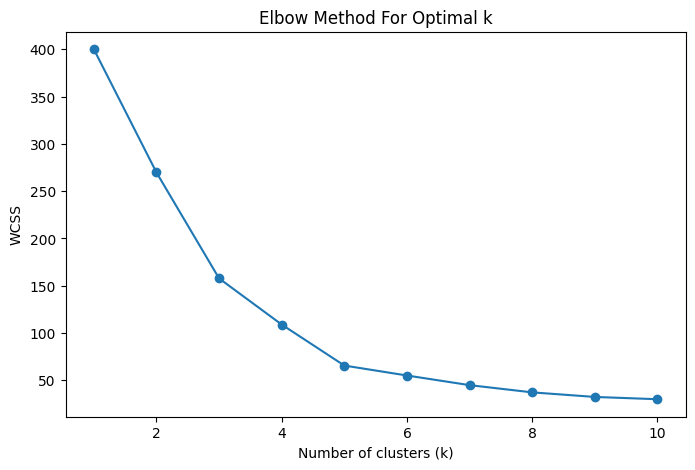

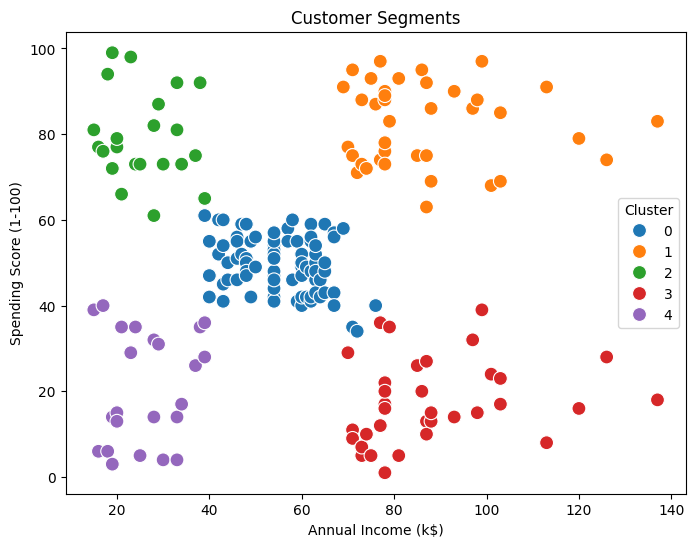

Clustered dataset saved to clustered_customers.csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"/mnt/data/Mall_Customers.csv.xlsx"
df = pd.read_excel(r"C:\Users\hegde\OneDrive\Documents\Mall_Customers.csv.xlsx")   # using Excel reader since extension suggests Excel format

print("Dataset preview:")
print(df.head())

# Select features (example: Annual Income and Spending Score if available)
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Elbow method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with chosen k (say 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=features.iloc[:,0], y=features.iloc[:,1], hue=df['Cluster'], palette="tab10", s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()

# Save clustered dataset
df.to_csv("clustered_customers.csv", index=False)
print("Clustered dataset saved to clustered_customers.csv")


In [15]:
import sys
!{sys.executable} -m pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\hegde\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip
